# <p><center style="font-family:newtimeroman;font-size:180%;"> Gender Detection Based on User Information </center></p>
### Table of contents:

* [Introduction](#1)
* [Import Libraries](#2)
* [Import Dataset](#3)
* [Preprocessing & Feature Engineering](#4)
* [Train Some Models](#5)
* [Select The Best Model](#6)
* [Evaluate The Model](#7)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Introduction</p>

<html>
<head>
</head>
<body>
  <h1>Gender Detection Based on User Information</h1>
  <p>Social networks have broad applications in today's world. Initially, they are used for entertainment and leisure. However, from another perspective, social networks can be utilized to identify behavioral patterns. For instance, by analyzing user opinions on social networks, we can identify weaknesses in our businesses.
Gender is one of the influential parameters in user behavior. When faced with a topic, women tend to react differently compared to men.
In this notebook, we intend to predict the gender of individuals based on the data provided by Twitter and Instagram users.</p>
</body>
</html>

<html>
<head>

<style>
body {
  font-family: Arial, sans-serif;
  font-size: 16px;
  line-height: 1.6;
}

h1 {
  text-align: center;
  margin-bottom: 30px;
}

table {
  margin: 0 auto;
  border-collapse: collapse;
  width: 100%;
}

th, td {
  padding: 10px;
  text-align: left;
  border-bottom: 1px solid #ddd;
}

th {
  background-color: #f2f2f2;
}

.description {
  text-align: left;
}
</style>
</head>
<body>
<h1>DataSet</h1>
<p>The training dataset consists of 8000 rows and 10 columns. More information about the data is provided in the table below.</p>
<table>
<tr>
<th>Column</th>
<th>Description</th>
</tr>
<tr>
<td class="description">Gender (Target Column)</td>
<td><code>Gender</code></td>
</tr>
<tr>
<td class="description">Age range of the user</td>
<td><code>Age</code></td>
</tr>
<tr>
<td class="description">The name written in the social network profile</td>
<td><code>FullName</code></td>
</tr>
<tr>
<td class="description">user name</td>
<td><code>UserName</code></td>
</tr>
<tr>
<td class="description">Biography of the user's social network</td>
<td><code>Biography</code></td>
</tr>
<tr>
<td class="description">The number of followers the user has</td>
<td><code>Follower_Count</code></td>
</tr>
<tr>
<td class="description">The Number of people following the user</td>
<td><code>Following_Count</code></td>
</tr>
<tr>
<td class="description">The business nature of the user account</td>
<td><code>Is_Business</code></td>
</tr>
<tr>
<td class="description">The user account has been verified</td>
<td><code>Is_Verified</code></td>
</tr>
<tr>
<td class="description">Account privacy</td>
<td><code>Is_Private</code></td>
</tr>
</table>
</body>
</html>

<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from emoji import emoji_count
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
import string
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
# Import DataSet
train = pd.read_csv('train_data.csv')
train.head()

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private
0,man,2,Farshid,mr_gh_farshid,دردا ک در این بادیه بسیار دویدیم...\nGlory man...,1604.0,1407.0,0.0,0.0,0.0
1,woman,2,zahr@72,zahra.roozbahani72,"خواهی که زکوچ در امان برگردی\nباید که به جان ,...",67.0,501.0,0.0,0.0,0.0
2,woman,2,ms farahnaz♥,___lady.farahnazi.__,"Having you, is all I wish for \nداشتنت، تمامِ...",0.0,0.0,0.0,0.0,0.0
3,woman,1,Lena.mommy farzan,mommy.lena3361,دردونه من لنا کوچولو,0.0,0.0,0.0,0.0,0.0
4,woman,2,Narsis Asadollahi,_l.aurora.l_,I am an animation student\n🎧🎼🎨⚓️🤍 \n@general.m...,200.0,328.0,0.0,0.0,0.0


In [3]:
# Get more Information about DataSet
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           8000 non-null   object 
 1   age              8000 non-null   int64  
 2   fullname         8000 non-null   object 
 3   username         8000 non-null   object 
 4   biography        8000 non-null   object 
 5   follower_count   8000 non-null   float64
 6   following_count  8000 non-null   float64
 7   is_business      7997 non-null   float64
 8   is_verified      8000 non-null   float64
 9   is_private       8000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 625.1+ KB


<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Preprocessing & Feature Engineering </p>
<a class="btn" href="#home">Tabel of Contents</a>

<AxesSubplot: xlabel='gender', ylabel='count'>

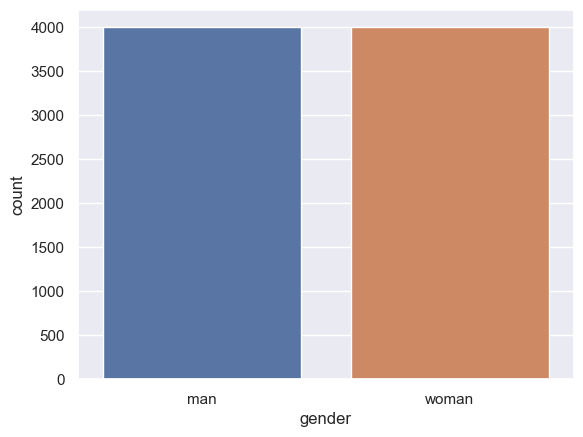

In [4]:
# Gender Distribution in Training Data: Countplot
sns.countplot(train.gender)

In [5]:
# Delete duplicated rows in dataset
def duplicated_rows(df):
    df=df.drop_duplicates(keep='first')
    return df

train= duplicated_rows(train)

In [6]:
# Removing NaN Values from 'is_business' Column in Training Data
train = train.dropna(subset=['is_business'], axis=0)

In [7]:
# Calculating Emoji Count in 'biography' Column of Training Data
train['emoji_count'] = train.biography.apply(emoji_count)

<AxesSubplot: xlabel='emoji_count', ylabel='Density'>

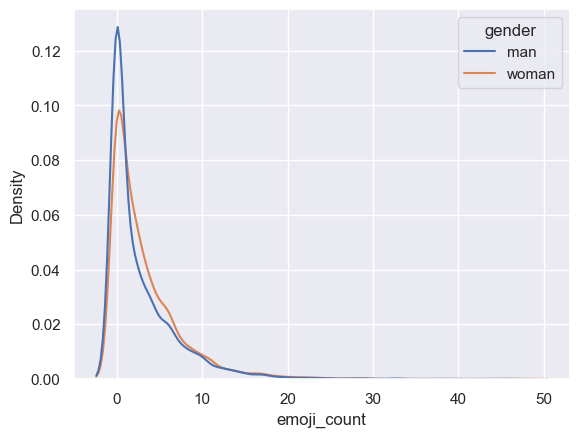

In [8]:
# Kernel Density Estimation of Emoji Count by Gender in Training Data
sns.kdeplot(train.emoji_count, hue=train.gender)

In [9]:
# Calculating Biography Length in Terms of Word Count in Training Data
train['bio_lenght']= train.biography.apply(lambda s : len(s.split()))

<AxesSubplot: xlabel='bio_lenght', ylabel='Density'>

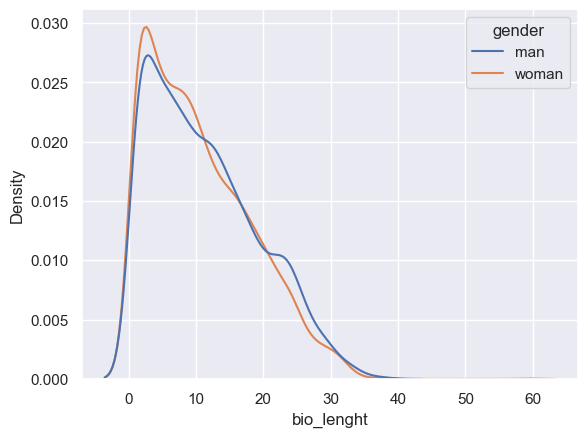

In [10]:
# Kernel Density Estimation of Biography Length by Gender in Training Data
sns.kdeplot(train.bio_lenght, hue=train.gender)

In [11]:
# Value Counts for categorical Columns
def show_count_values(*args):
    for col in args:
        print(train[col].value_counts())
        print("++++++++++++++++++++++++++++++++++")

show_count_values('gender','age','is_business','is_verified','is_private')

gender
man      3999
woman    3998
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++
age
2    3427
3    3370
4    1036
1     164
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++
is_business
0.0    7171
1.0     826
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++
is_verified
0.0    7996
1.0       1
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++
is_private
0.0    7997
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++


<!DOCTYPE html>
<html>
<head>
</head>
<body>
  <h1>Removing Redundant Columns: Streamlining Data and Enhancing Analysis Efficiency</h1>
  <p>
When all values in a column are the same, it is considered a "duplicate" or "fixed" situation. In such cases, it is advisable to remove the column as it has no impact on modeling and provides no valuable information. Removing redundant columns streamlines the dataset, improves efficiency, and allows for clearer analysis of remaining features.
  </p>
</body>
</html>

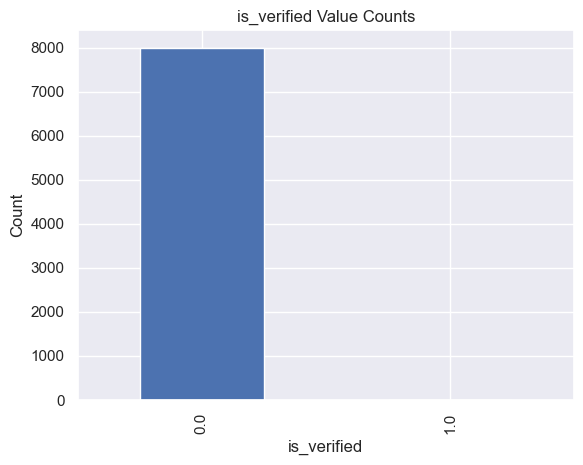

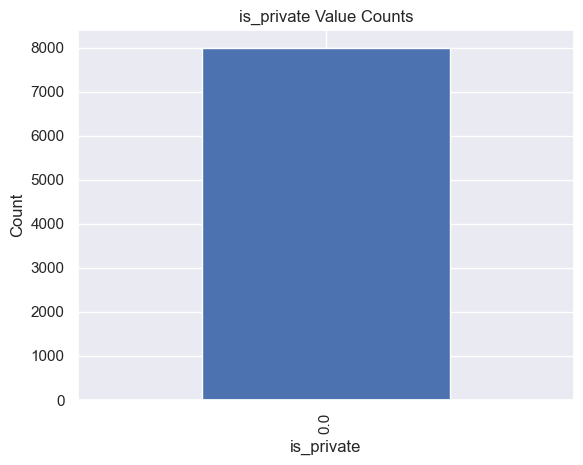

In [12]:
# Value Counts for categorical Columns
def show_count_values(*args):
    for col in args:
        value_counts = train[col].value_counts()
        value_counts.plot(kind='bar')
        plt.title(f'{col} Value Counts')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

# Call the show_count_values function to display figures for the specified columns
show_count_values('is_verified', 'is_private')

In [13]:
# Function to Remove Constant Columns from a DataFrame
def remove_constant_col(df, *args):
    for col in args:
        df = df.drop(col, axis=1)
    return df

train = remove_constant_col(train, 'is_verified','is_private')
    

In [14]:
# Split Dataset to train and validation
y=train.gender
x=train.drop(columns='gender')

x_train ,x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=24) 

In [15]:
# Encoding Categorical Target Variables using LabelEncoder
def encode_col(y_train):
    encoder = LabelEncoder()
    y_train_encoded = encoder.fit_transform(y_train)
    return y_train_encoded

y_train = encode_col(y_train)
y_val = encode_col(y_val)

In [16]:
# Text Preprocessing Functions for Natural Language Processing (NLP)

def preprocess_text(text):
    text = text_lowercase(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = remove_whitespace(text)
    text = remove_stopwords(text)
    text = lemmatize_word(text)
    return text

def text_lowercase(text):
    return text.lower()

def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_whitespace(text):
    return " ".join(text.split())

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return " ".join(filtered_text)

def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in word_tokens]
    return " ".join(lemmas)



In [17]:
# Converting Specific Columns to Integer Data Type in a DataFrame
def convert_to_int(df, *args):
    for col in args:
        df[col] = df[col].astype(int)
    return df

# Convert the columns to integers in x_train
x_train = convert_to_int(x_train, 'follower_count', 'following_count', 'is_business')

# Convert the columns to integers in x_val
x_val = convert_to_int(x_val, 'follower_count', 'following_count', 'is_business')

<!DOCTYPE html>
<html>
<head>
</head>
<body>
  <h1>Textual Data Extraction and Vectorization for Machine Learning Training</h1>
  <p>
In this step, we extract textual data from other features and use vectorization to convert it into a numerical format suitable for training machine learning models.
  </p>
    <h1>TF-IDF (Term Frequency-Inverse Document Frequency) vectorization</h1>
  <p>
TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a popular technique used in natural language processing (NLP) to convert textual data into numerical representations. It assigns weights to words based on their frequency in a document and their rarity across all documents in a corpus. The TF-IDF score reflects the importance of a word in a specific document relative to its occurrence in other documents. This vectorization method helps capture the significance of words in a document and is commonly used for tasks such as text classification, information retrieval, and clustering in machine learning.
  </p>
</body>
</html>


In [26]:
# Applying Text Preprocessing to Specific Columns in a DataFrame
columns_to_extract = ['fullname' ,'username' ,'biography']
for col in columns_to_extract:

    x_train[col] = x_train[col].apply(preprocess_text)
    x_val[col] = x_val[col].apply(preprocess_text)


In [27]:
# TF-IDF Vectorization for Textual Features Concatenated from fullname, username, and biography
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit_transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Training and Evaluation of Models Using Tree-based Algorithms</p>
<a class="btn" href="#home">Tabel of Contents</a>

<html>
<head>
</head>
<body>
  <h1>Decision tree-based algorithms</h1>
  <p>Decision tree-based algorithms use a tree-like structure for decision-making. They are popular because they are effective and interpretable. These algorithms, like Decision Trees, Random Forests, Extra Trees, and XGBoost, can capture complex relationships, handle different types of data, and provide interpretability. Random Forests and Extra Trees reduce overfitting by using multiple trees, while XGBoost builds trees sequentially to improve performance. Decision tree-based algorithms are important for handling non-linear relationships, missing values, and large datasets. They also provide feature importance, aiding in feature selection and understanding data patterns. Overall, they are widely used for classification tasks.</p>
</body>
</html>

In [ ]:
# Define the XGBoost model
model = XGBClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.5],
    'colsample_bylevel' : [0.1, 0.2, 0.3, 0.5],
    'min_child_weight': [1, 3, 5,7],
}


# Perform grid search to find the best hyperparameters
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, n_jobs=-1)
grid_search.fit(tfidf_vectorizer.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography), y_train)

# Print the best hyperparameters and the corresponding score
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

In [ ]:
# setup hyperparameters for XGBClassifier
txt_model = XGBClassifier(booster= 'gbtree', learning_rate= 0.1, max_depth= 5, n_estimators=150, colsample_bylevel= 0.5, colsample_bytree=0.5, min_child_weight=1)
txt_model.fit(tfidf_vectorizer.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography), y_train)
y_pred = txt_model.predict(tfidf_vectorizer.transform(x_val.fullname + ' ' + x_val.username + ' ' + x_val.biography))

# define the evaluation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# evaluate the model on the dataset
n_scores = cross_val_score(txt_model, tfidf_vectorizer.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography), y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Accuracy score (training): {0:.3f}".format(txt_model.score(tfidf_vectorizer.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography), y_train)))
print("Accuracy score (validation): {0:.3f}".format(txt_model.score(tfidf_vectorizer.transform(x_val.fullname + ' ' + x_val.username + ' ' + x_val.biography), y_val)))

In [24]:

txt_model = XGBClassifier()
txt_model.fit(tfidf_vectorizer.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography), y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [25]:
print(classification_report(y_val, \
                            txt_model.predict(tfidf_vectorizer.transform(x_val.fullname + ' ' + x_val.username + ' ' + x_val.biography))))

              precision    recall  f1-score   support

           0       0.85      0.51      0.64       816
           1       0.64      0.91      0.75       784

    accuracy                           0.70      1600
   macro avg       0.75      0.71      0.69      1600
weighted avg       0.75      0.70      0.69      1600



# Save result of Prediction of Gender based on Textual Features using TF-IDF Vectorization in a new columns



In [3]:
# Save result of Prediction of Gender based on Textual Features using TF-IDF Vectorization in a new columns
gender_by_txt_features_train =  txt_model.predict(tfidf_vectorizer.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography))
gender_by_txt_features_val =  txt_model.predict(tfidf_vectorizer.transform(x_val.fullname + ' ' + x_val.username + ' ' + x_val.biography))

# Save the predicted gender in new columns
x_train['gender_by_txt'] = gender_by_txt_features_train
x_val['gender_by_txt'] = gender_by_txt_features_val

# Removal of Textual Features from Training and Validation Data
x_train= x_train.drop(columns=columns_to_extract, axis=1)
x_val= x_val.drop(columns=columns_to_extract, axis=1)

NameError: name 'txt_model' is not defined

# Model 1: DecisionTreeClassifier

In [ ]:
# Create an instance of the DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

# Define the hyperparameter grid
hyperparameters = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(DT_model, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_et_classifier = grid_search.best_estimator_
best_hyperparameters = grid_search.best_params_

# Train the best model on your data
best_et_classifier.fit(x_train, y_train)

# Make predictions on new data
predictions = best_et_classifier.predict(x_val)

# Evaluate the model
print(classification_report(y_val, predictions))
f1 = f1_score(y_val, predictions)
print("F1-score:", f1)

# Model 2: ExtraTreesClassifier

In [ ]:
# Create an instance of the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier()

# Define the hyperparameter grid
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(et_classifier, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_et_classifier = grid_search.best_estimator_
best_hyperparameters = grid_search.best_params_

# Train the best model on your data
best_et_classifier.fit(x_train, y_train)

# Make predictions on new data
predictions = best_et_classifier.predict(x_val)

# Evaluate the model
print(classification_report(y_val, predictions))
f1 = f1_score(y_val, predictions)
print("F1-score:", f1)

# Model 3: RandomForestClassifier

In [ ]:
# Create an instance of the RandomForestClassifier
RF_model = RandomForestClassifier()

# Define the hyperparameter grid
hyperparameters = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [2,3,4,5,6,10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(RF_model, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)


# Get the best model and its hyperparameters
best_et_classifier = grid_search.best_estimator_
best_hyperparameters = grid_search.best_params_

# Train the best model on your data
best_et_classifier.fit(x_train, y_train)

# Make predictions on new data
predictions = best_et_classifier.predict(x_val)

# Evaluate the model
print(classification_report(y_val, predictions))
f1 = f1_score(y_val, predictions)
print("F1-score:", f1)

# Model 4: XGBClassifier

In [ ]:
# Create an instance of the XGBClassifier
XGB_model = XGBClassifier()

# Define the hyperparameter grid
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.5],
    'colsample_bylevel' : [0.1, 0.2, 0.3, 0.5],
    'min_child_weight': [1, 3, 5,7],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(XGB_model, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)


# Get the best model and its hyperparameters
best_et_classifier = grid_search.best_estimator_
best_hyperparameters = grid_search.best_params_

# Train the best model on your data
best_et_classifier.fit(x_train, y_train)

# Make predictions on new data
predictions = best_et_classifier.predict(x_val)

# Evaluate the model
print(classification_report(y_val, predictions))
f1 = f1_score(y_val, predictions)
print("F1-score:", f1)

<a id="7"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Thank you for taking the time to review my notebook. If you have any questions or criticisms, please kindly let me know in the comments section.  </p>